# How to Choose the Number of Clusters 

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [3]:
# Load the data
raw_data = pd.read_csv(os.path.join(os.path.pardir,'data','raw','Countries-exercise.csv'))
# Check the data
raw_data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

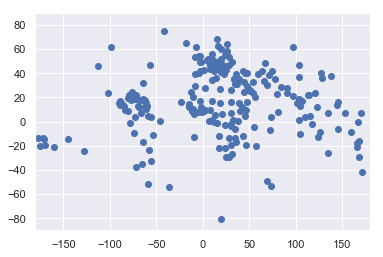

In [18]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather 'Longitude' and 'Laditude'.

In [20]:
x = raw_data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
5,19.953288,60.214887
6,1.560544,42.542291
7,54.300167,23.905282
8,-65.179807,-35.381349
9,44.929933,40.289526


## Clustering

Use 4 clusters initially. 

In [21]:
kmeans = KMeans(4)

In [22]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 3, 0, 2, 3, 1, 0, 0, 1, 1, 1,
       3, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 0, 0, 1, 2, 3, 1, 0,
       0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 1, 0, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       3, 2, 3, 0, 2, 1, 2, 1, 3, 1, 0, 3, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0,
       3, 0, 0, 0, 0, 3, 2, 2, 3, 1, 0, 3, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1,
       3, 2, 1, 1, 1, 0, 0, 2, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 2, 0, 0, 3,
       0, 3, 1, 3, 1, 2, 2, 1, 1, 0, 3, 3, 0, 0, 2, 2, 2, 3, 3, 3, 1, 2,
       3, 1, 2, 0, 2, 0, 1, 3, 0, 1, 0, 0, 0, 1, 3, 2, 1, 3, 1, 2, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 3, 0, 0, 3, 2, 2, 1,
       1, 3, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0],
      dtype=int32)

In [25]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,1
5,Aland,19.953288,60.214887,1
6,Andorra,1.560544,42.542291,1
7,United Arab Emirates,54.300167,23.905282,0
8,Argentina,-65.179807,-35.381349,2
9,Armenia,44.929933,40.289526,0


Plot the data once again. This time use the <i> c </i> parameter to separate the data by the clusters we defined.  

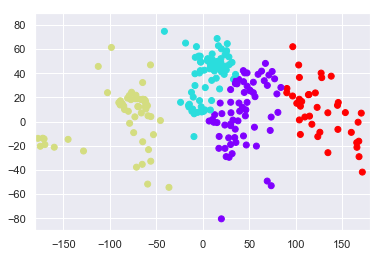

In [27]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [28]:
kmeans.inertia_

256573.08675934302

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [29]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [30]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192212.4818949704,
 152164.15221066383,
 127441.86290093459,
 102873.2526445741,
 84945.19461239543,
 76499.77258640353]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

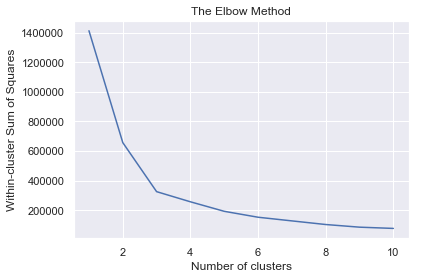

In [32]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, plot several graphs with the appropriate amount of clusters you believe would best fit the data.

In this this specific case, that would be 2 or 3.
Compare the scatter plots to determine which one to use in any further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [33]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
identified_clusters = kmeans.fit_predict(x)

In [41]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

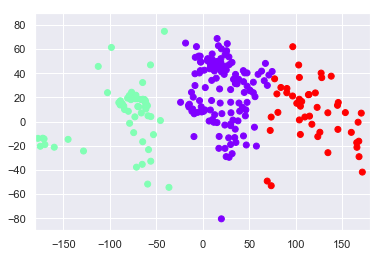

In [43]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

In [44]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
identified_clusters = kmeans.fit_predict(x)

In [48]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

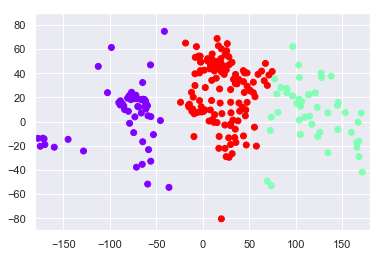

In [49]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Think about the geological developments of Earth and how it split from one big continent (Pangea) into smaller multiple smaller ones. 